# Dicoding 1st Task

In [238]:
import numpy as np
import pandas as pd

In [239]:
car_df = pd.read_csv('./sport-car-price.csv')
car_df

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"
...,...,...,...,...,...,...,...,...
1002,Koenigsegg,Jesko,2022,5,1280,1106,2.5,"3,000,000"
1003,Lotus,Evija,2021,Electric Motor,1972,1254,2,"2,000,000"
1004,McLaren,Senna,2021,4,789,590,2.7,"1,000,000"
1005,Pagani,Huayra,2021,6,764,738,3,"2,600,000"


## Exploratory Data Analysis (EDA)

In [240]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Car Make                 1007 non-null   object
 1   Car Model                1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price (in USD)           1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


In [241]:
car_df.columns

Index(['Car Make', 'Car Model', 'Year', 'Engine Size (L)', 'Horsepower',
       'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)'],
      dtype='object')

Menghapus kolom 'Car Model' karena kolom ini tidak dibutuhkan untuk melakukan prediksi

In [242]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
car_df['Car Make'] = le.fit_transform(car_df['Car Make'])

In [243]:
car_df.drop(columns='Car Model',axis=1,inplace=True)
car_df.head(5)


,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3,379,331,4,"101,200"
1,16,2021,5.2,630,443,2.8,"274,390"
2,11,2022,3.9,661,561,3,"333,750"
3,5,2022,5.2,562,406,3.2,"142,700"
4,21,2021,4,710,568,2.7,"298,000"


Mengubah semua value ke dalam bentuk integer atau float

In [244]:
car_df['Price (in USD)']=car_df['Price (in USD)'].str.replace(',', '')
car_df['Price (in USD)'] = pd.to_numeric(car_df['Price (in USD)'], errors='coerce')
car_df['Engine Size (L)'] = pd.to_numeric(car_df['Engine Size (L)'], errors='coerce')
car_df['Horsepower'] = pd.to_numeric(car_df['Horsepower'], errors='coerce')
car_df['Torque (lb-ft)'] = pd.to_numeric(car_df['Torque (lb-ft)'], errors='coerce')
car_df['0-60 MPH Time (seconds)'] = pd.to_numeric(car_df['0-60 MPH Time (seconds)'], errors='coerce')

# Khusus untuk harga terdapat perlakuan berbeda
car_df.head(5)

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3.0,379.0,331.0,4.0,101200
1,16,2021,5.2,630.0,443.0,2.8,274390
2,11,2022,3.9,661.0,561.0,3.0,333750
3,5,2022,5.2,562.0,406.0,3.2,142700
4,21,2021,4.0,710.0,568.0,2.7,298000


In [245]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Car Make                 1007 non-null   int64  
 1   Year                     1007 non-null   int64  
 2   Engine Size (L)          948 non-null    float64
 3   Horsepower               998 non-null    float64
 4   Torque (lb-ft)           999 non-null    float64
 5   0-60 MPH Time (seconds)  1006 non-null   float64
 6   Price (in USD)           1007 non-null   int64  
dtypes: float64(4), int64(3)
memory usage: 55.2 KB


In [246]:
a = car_df['Car Make'].isnull().sum()
b = car_df['Year'].isnull().sum()
c = car_df['Engine Size (L)'].isnull().sum()
d = car_df['Horsepower'].isnull().sum()
e = car_df['Torque (lb-ft)'].isnull().sum()
f = car_df['0-60 MPH Time (seconds)'].isnull().sum()
g = car_df['Price (in USD)'].isnull().sum()

print(a,b,c,d,e,f,g)


0 0 59 9 8 1 0


In [247]:
car_df

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3.0,379.0,331.0,4.00,101200
1,16,2021,5.2,630.0,443.0,2.80,274390
2,11,2022,3.9,661.0,561.0,3.00,333750
3,5,2022,5.2,562.0,406.0,3.20,142700
4,21,2021,4.0,710.0,568.0,2.70,298000
...,...,...,...,...,...,...,...
1002,15,2022,5.0,1280.0,1106.0,2.50,3000000
1003,18,2021,NaN,1972.0,1254.0,2.00,2000000
1004,21,2021,4.0,789.0,590.0,2.70,1000000
1005,25,2021,6.0,764.0,738.0,3.00,2600000


In [248]:
car_df.fillna(car_df.mean(skipna=True),inplace=True)
car_df

,Car Make,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,28,2022,3.000000,379.0,331.0,4.00,101200
1,16,2021,5.200000,630.0,443.0,2.80,274390
2,11,2022,3.900000,661.0,561.0,3.00,333750
3,5,2022,5.200000,562.0,406.0,3.20,142700
4,21,2021,4.000000,710.0,568.0,2.70,298000
...,...,...,...,...,...,...,...
1002,15,2022,5.000000,1280.0,1106.0,2.50,3000000
1003,18,2021,4.395781,1972.0,1254.0,2.00,2000000
1004,21,2021,4.000000,789.0,590.0,2.70,1000000
1005,25,2021,6.000000,764.0,738.0,3.00,2600000


In [249]:
car_df['Engine Size (L)']=car_df['Engine Size (L)'].astype(int)
car_df['Horsepower']=car_df['Horsepower'].astype(int)
car_df['Torque (lb-ft)']=car_df['Torque (lb-ft)'].astype(int)
car_df['0-60 MPH Time (seconds)']=car_df['0-60 MPH Time (seconds)'].astype(int)

In [250]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Car Make                 1007 non-null   int64
 1   Year                     1007 non-null   int64
 2   Engine Size (L)          1007 non-null   int64
 3   Horsepower               1007 non-null   int64
 4   Torque (lb-ft)           1007 non-null   int64
 5   0-60 MPH Time (seconds)  1007 non-null   int64
 6   Price (in USD)           1007 non-null   int64
dtypes: int64(7)
memory usage: 55.2 KB


In [251]:
import datetime
yr = datetime.datetime.now().year

In [252]:
car_df['Age'] = yr - car_df['Year']

In [253]:
car_df.columns

Index(['Car Make', 'Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)',
       '0-60 MPH Time (seconds)', 'Price (in USD)', 'Age'],
      dtype='object')

## Visualisasi dData

In [254]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


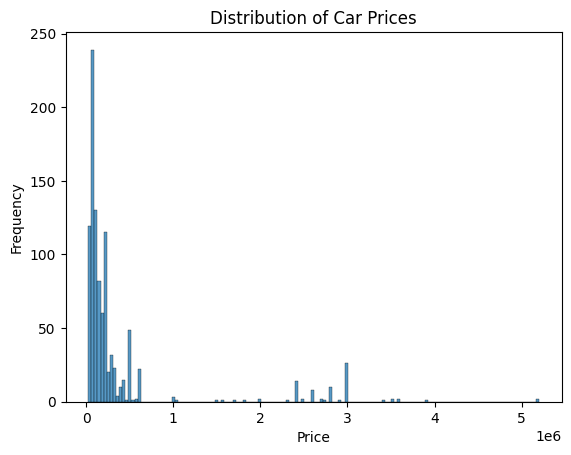

In [255]:
sns.histplot(data=car_df,x='Price (in USD)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Car Prices')
plt.show()

In [256]:
numeric_cols = ['Year', 'Engine Size (L)', 'Horsepower', 'Torque (lb-ft)', '0-60 MPH Time (seconds)', 'Price (in USD)', 'Age']
corr_mat = car_df[numeric_cols].corr()

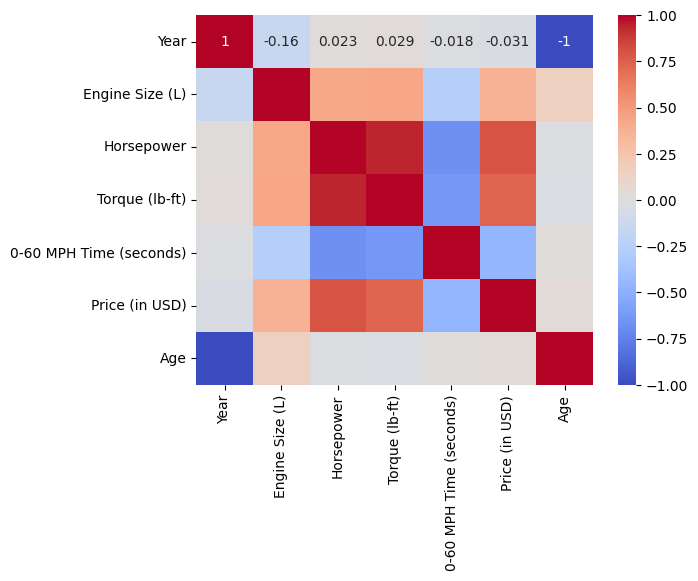

In [257]:
sns.heatmap(corr_mat,annot=True,cmap='coolwarm')
plt.show()

/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

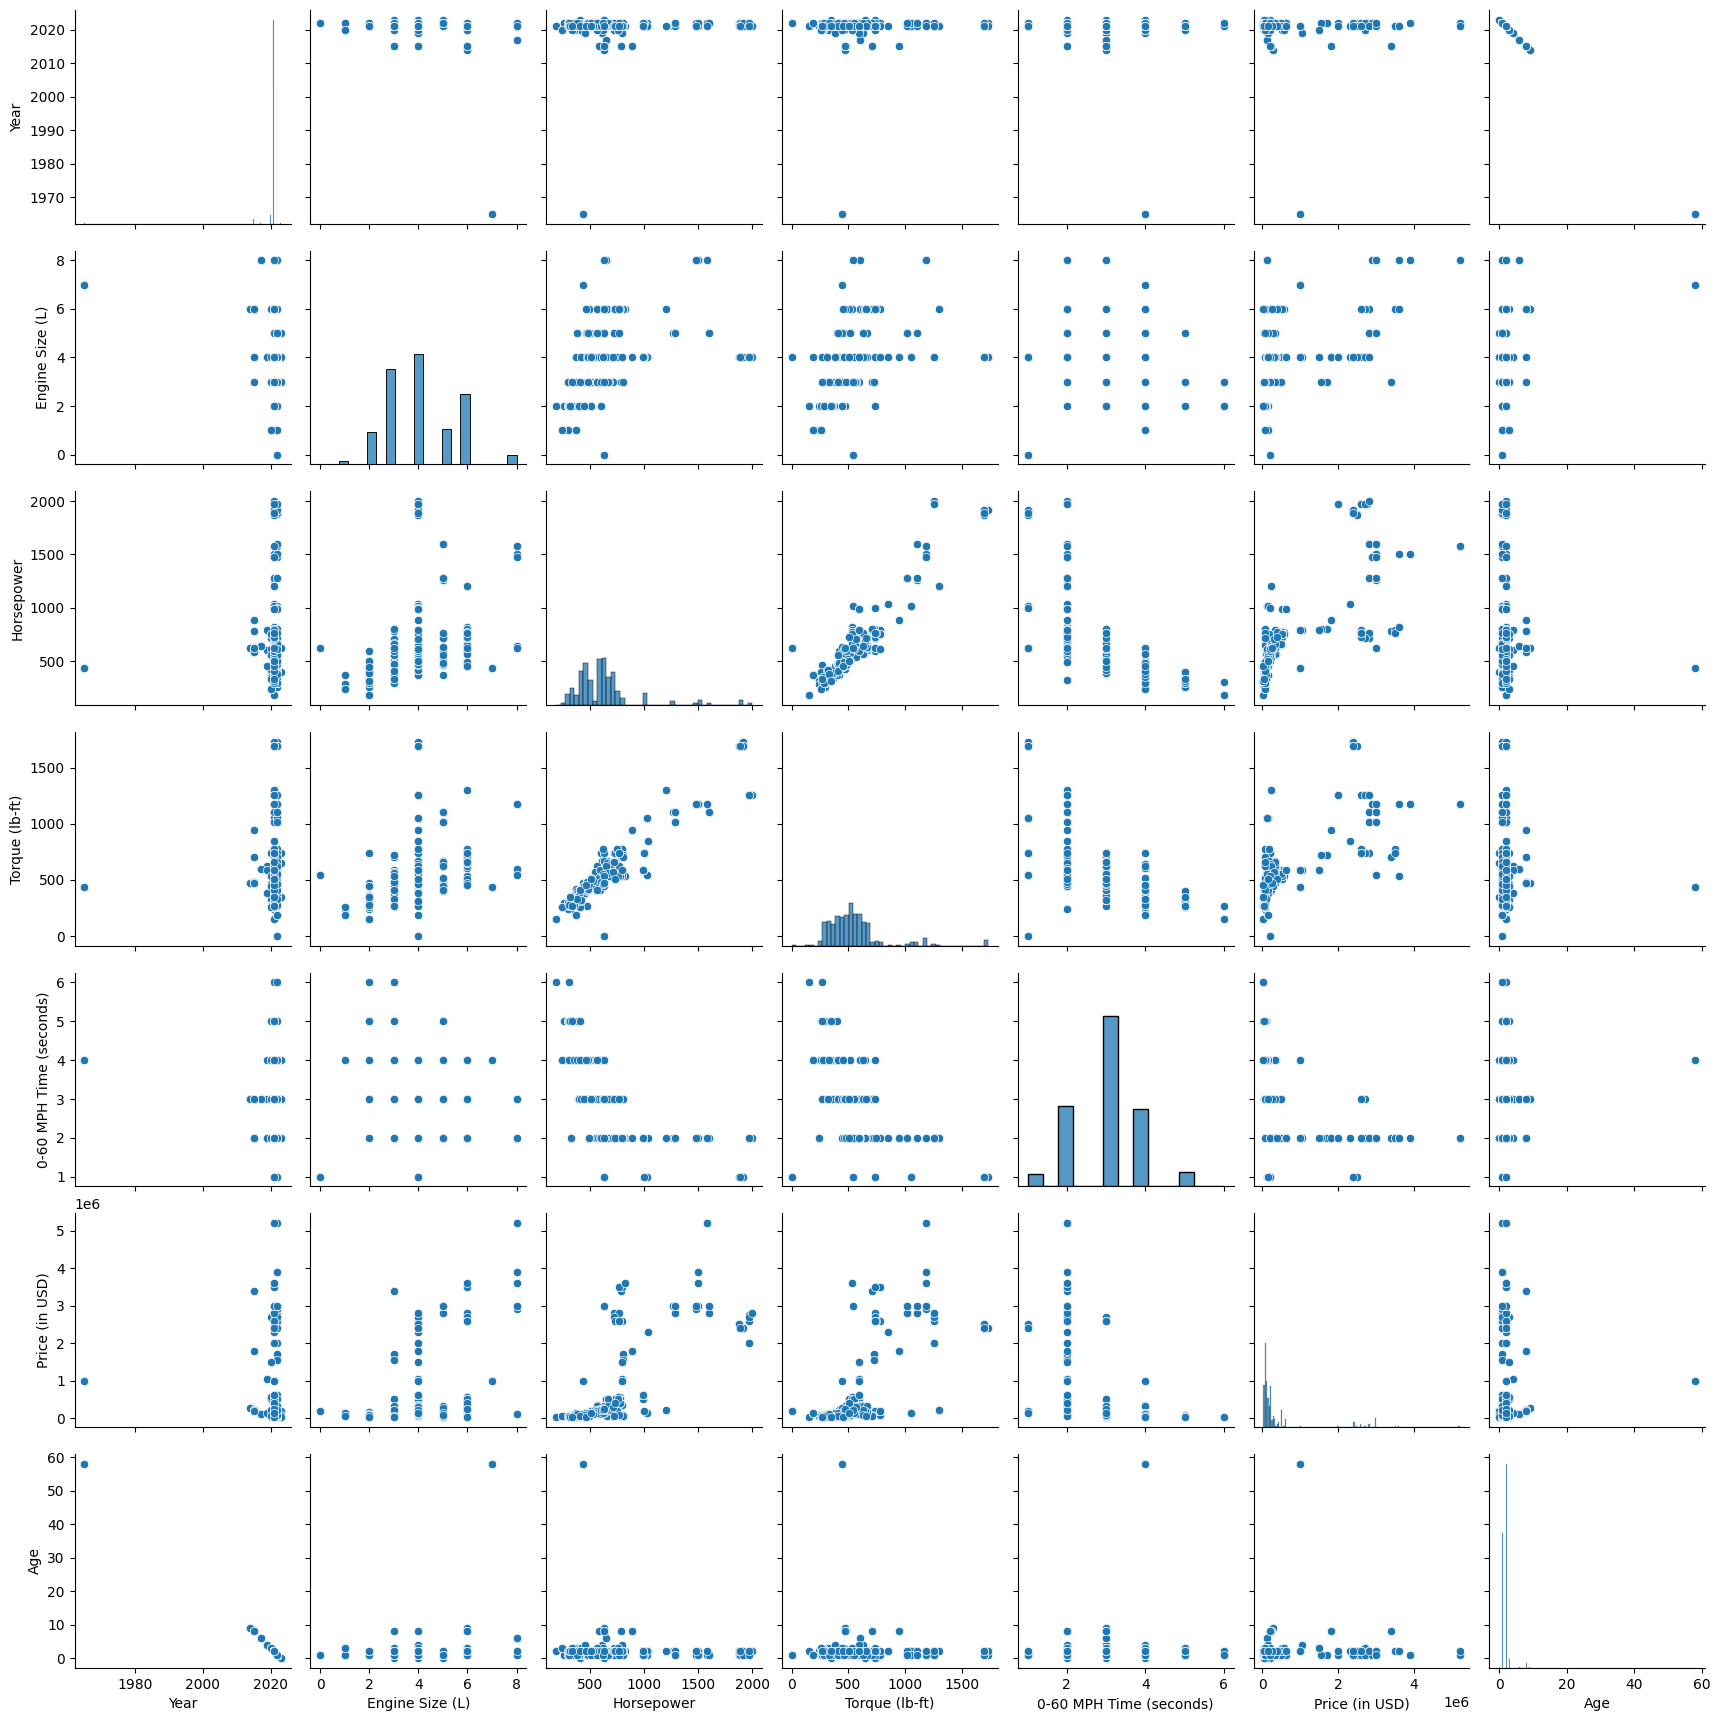

In [258]:
sns.pairplot(car_df[numeric_cols])

/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


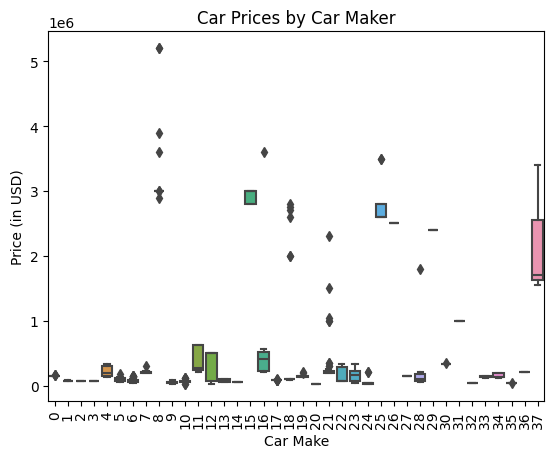

In [259]:
sns.boxplot(data=car_df, x='Car Make', y='Price (in USD)')
plt.xticks(rotation=90)
plt.xlabel('Car Make')
plt.ylabel('Price (in USD)')
plt.title('Car Prices by Car Maker')
plt.show()

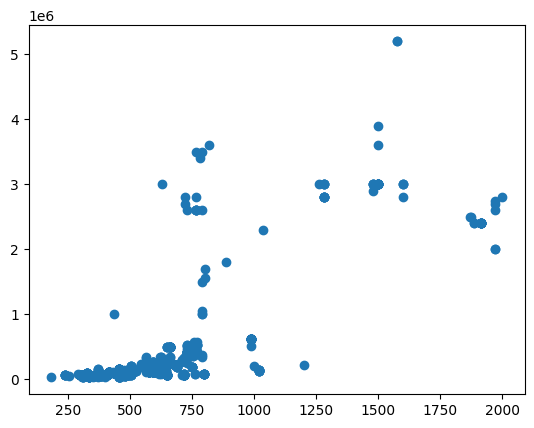

In [260]:
plt.scatter(car_df['Horsepower'], car_df['Price (in USD)'])

In [261]:
from sklearn.model_selection import train_test_split
X = car_df.drop(columns='Price (in USD)',axis=1)

In [262]:
y=car_df['Price (in USD)']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [264]:
from sklearn.linear_model import LogisticRegression


# Create an instance of the Linear Regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

/home/mizanul/Documents/code/.venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [265]:
from sklearn.metrics import r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared value
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.7936474479296461


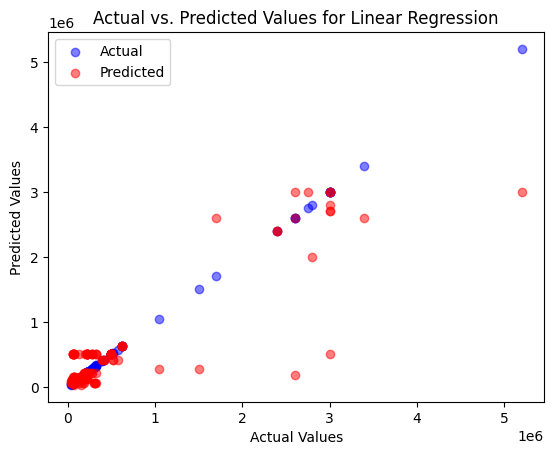

In [266]:
import matplotlib.pyplot as plt

# Assuming you have already trained your linear regression model and made predictions
# y_test contains the actual target values, and y_pred contains the predicted values

# Create separate scatter plots for actual and predicted values
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual')
plt.scatter(y_test, y_pred, color='red', alpha=0.5, label='Predicted')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for Linear Regression")
plt.legend()
plt.show()